In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [61]:
from keras.datasets import mnist

In [62]:
data  = mnist.load_data()

In [63]:
(X_train,y_train),(X_test,y_test) = data

In [64]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [65]:
print(X_train[7])
print(y_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

In [66]:
np.max(X_train[7])

255

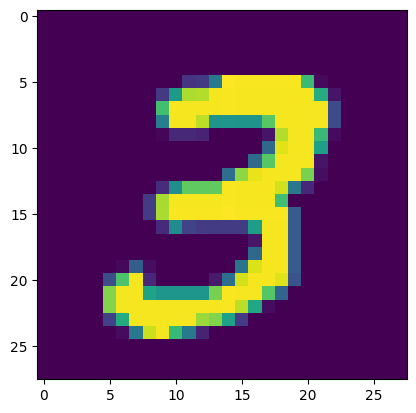

In [67]:
plt.imshow(X_train[7])

In [68]:
X_train = X_train/255
X_test = X_test/255

In [69]:
X_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [70]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(128,activation = "relu"))
model.add(keras.layers.Dense(64,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [71]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer = "adam" ,loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [73]:
from sklearn.model_selection  import train_test_split
X_train,X_train_valid,y_train,y_train_valid = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

In [74]:
history = model.fit(X_train,y_train ,epochs = 10,validation_data = (X_train_valid,y_train_valid))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8612 - loss: 0.4767 - val_accuracy: 0.9606 - val_loss: 0.1387
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9598 - loss: 0.1279 - val_accuracy: 0.9671 - val_loss: 0.1097
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9742 - loss: 0.0793 - val_accuracy: 0.9731 - val_loss: 0.0885
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0567 - val_accuracy: 0.9722 - val_loss: 0.0966
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9737 - val_loss: 0.0921
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0336 - val_accuracy: 0.9743 - val_loss: 0.1027
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0263 - val_accuracy: 0.9725 - val_loss: 0.1127
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0229 - 

In [75]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9684 - loss: 0.1405


[0.11580879986286163, 0.9735000133514404]

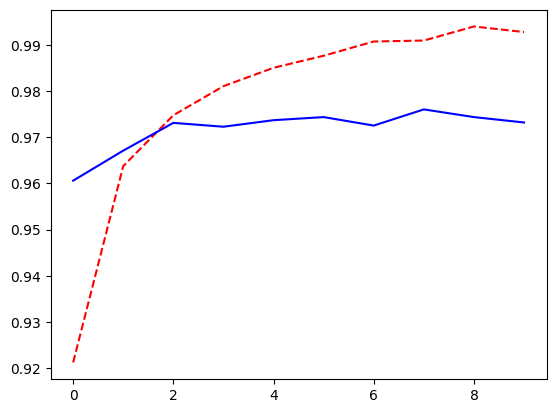

In [85]:
plt.plot(history.history["accuracy"],color = "red",linestyle = "--")
plt.plot(history.history["val_accuracy"],color = "blue")

In [79]:
history.history["accuracy"]

[0.9212499856948853,
 0.9637291431427002,
 0.9747291803359985,
 0.9810208082199097,
 0.9850000143051147,
 0.9876041412353516,
 0.9906874895095825,
 0.9908958077430725,
 0.9939374923706055,
 0.9927291870117188]

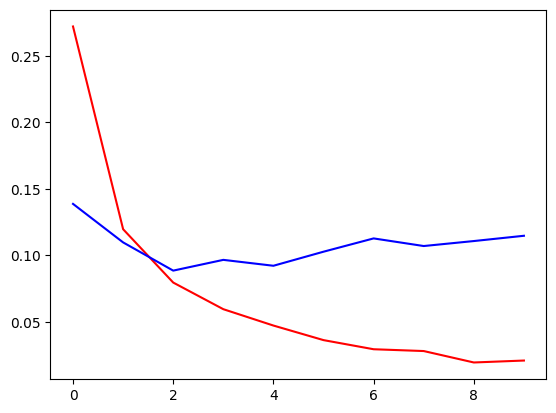

In [82]:
plt.plot(history.history["loss"],color = "red",)
plt.plot(history.history["val_loss"],color = "blue")